<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preliminary-Wrangling-and-Exploration" data-toc-modified-id="Preliminary-Wrangling-and-Exploration-1">Preliminary Wrangling and Exploration</a></span><ul class="toc-item"><li><span><a href="#Calendar-data" data-toc-modified-id="Calendar-data-1.1">Calendar data</a></span></li><li><span><a href="#Listing-data" data-toc-modified-id="Listing-data-1.2">Listing data</a></span></li><li><span><a href="#Review-data" data-toc-modified-id="Review-data-1.3">Review data</a></span></li></ul></li><li><span><a href="#Business-Understanding" data-toc-modified-id="Business-Understanding-2">Business Understanding</a></span><ul class="toc-item"><li><span><a href="#Exploration-and-Analysis-for-Questions" data-toc-modified-id="Exploration-and-Analysis-for-Questions-2.1">Exploration and Analysis for Questions</a></span><ul class="toc-item"><li><span><a href="#Question-1:-Which-locations-have-the-most-expensive-properties-or-the-least-expensive-properties?" data-toc-modified-id="Question-1:-Which-locations-have-the-most-expensive-properties-or-the-least-expensive-properties?-2.1.1">Question 1: Which locations have the most expensive properties or the least expensive properties?</a></span><ul class="toc-item"><li><span><a href="#Initial-data-preparation" data-toc-modified-id="Initial-data-preparation-2.1.1.1">Initial data preparation</a></span></li><li><span><a href="#Data-visualisation-and-analysis" data-toc-modified-id="Data-visualisation-and-analysis-2.1.1.2">Data visualisation and analysis</a></span></li></ul></li><li><span><a href="#Question-2:-Which-locations-have-the-highest-rated-properties?" data-toc-modified-id="Question-2:-Which-locations-have-the-highest-rated-properties?-2.1.2">Question 2: Which locations have the highest rated properties?</a></span></li><li><span><a href="#Question-3:-Do-prices-vary-seasonally?-In-which-periods-are-the-prices-highest-or-lowest?" data-toc-modified-id="Question-3:-Do-prices-vary-seasonally?-In-which-periods-are-the-prices-highest-or-lowest?-2.1.3">Question 3: Do prices vary seasonally? In which periods are the prices highest or lowest?</a></span><ul class="toc-item"><li><span><a href="#Initial-data-preparation" data-toc-modified-id="Initial-data-preparation-2.1.3.1">Initial data preparation</a></span></li><li><span><a href="#Data-visualisation-and-analysis" data-toc-modified-id="Data-visualisation-and-analysis-2.1.3.2">Data visualisation and analysis</a></span></li></ul></li><li><span><a href="#Question-4:-Can-we-predict-the-price-of-a-property-by-its-characteristics,-and-which-characteristics-have-the-highest-correlation-with-price?" data-toc-modified-id="Question-4:-Can-we-predict-the-price-of-a-property-by-its-characteristics,-and-which-characteristics-have-the-highest-correlation-with-price?-2.1.4">Question 4: Can we predict the price of a property by its characteristics, and which characteristics have the highest correlation with price?</a></span><ul class="toc-item"><li><span><a href="#Initial-data-preparation:" data-toc-modified-id="Initial-data-preparation:-2.1.4.1">Initial data preparation:</a></span></li><li><span><a href="#Create-and-analyse-model" data-toc-modified-id="Create-and-analyse-model-2.1.4.2">Create and analyse model</a></span></li></ul></li><li><span><a href="#Question-5:-Can-we-predict-the-average-user-rating-of-a-property-by-its-characteristics,-and-which-characteristics-have-the-highest-correlation-with-rating?" data-toc-modified-id="Question-5:-Can-we-predict-the-average-user-rating-of-a-property-by-its-characteristics,-and-which-characteristics-have-the-highest-correlation-with-rating?-2.1.5">Question 5: Can we predict the average user rating of a property by its characteristics, and which characteristics have the highest correlation with rating?</a></span></li></ul></li></ul></li></ul></div>

# Explore and Analyse Seattle AirBnB Data

In this document, I will explore Seattle AirBnB data 

## Preliminary Wrangling and Exploration

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import statsmodels.api as sm

# Note: Jupyter Notebook created using Monokai dark theme from JupyterThemes package
# Format plots for dark background
from jupyterthemes import jtplot
jtplot.style('monokai')

In [2]:
# Read csv data into dataframes
df_calendar = pd.read_csv('calendar.csv')
df_listings = pd.read_csv('listings.csv')
df_reviews = pd.read_csv('reviews.csv')

### Calendar data

In [3]:
# Set option to see all columns
pd.set_option('display.max_columns', None)

df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


For the calendar file, the data includes listing IDs, including a corresponding date, what appears to be a Boolean value for availability, and price. Price appears to only be shown if availability is true.

A single listing ID appears to have multiple associated dates, and it would appear that a listing includes daily updates in availability status and price.

Dates appear to include 2016 only. To be confirmed

In [4]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


Looking at data types, they may need to be cleaned before analysis. Date should be converted to a recognised date-time format, availability should be Boolean and price should be a floating number.

In [5]:
# Make duplicate of dataframe and convert rows to appropriate data types
df_calendar_clean = df_calendar.copy()
df_calendar_clean['date'] = pd.to_datetime(df_calendar['date'])
df_calendar_clean['available'] = (df_calendar['available'] == 't')
df_calendar_clean['price'] = df_calendar['price'].str.replace(
    '$', '').str.replace(',', '').astype(float)

In [6]:
# Check that types are successfully converted
df_calendar_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1393570 non-null  int64         
 1   date        1393570 non-null  datetime64[ns]
 2   available   1393570 non-null  bool          
 3   price       934542 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1)
memory usage: 33.2 MB


In [7]:
df_calendar_clean.describe()

,listing_id,price
count,1.393570e+06,934542.000000
mean,5.550111e+06,137.944859
std,2.962274e+06,105.062870
min,3.335000e+03,10.000000
25%,3.258213e+06,75.000000
50%,6.118244e+06,109.000000
75%,8.035212e+06,160.000000
max,1.034016e+07,1650.000000


We see that the price ranges from 10 dollars to 1,650 dollars

In [8]:
df_calendar_clean["listing_id"].nunique()

3818

The calendar data has 3,818 unique listing IDs

In [9]:
# Check how many rows where availability is true has NaN price
(df_calendar_clean[df_calendar_clean['available'] == True]['price'].isna()).sum()

0

The above confirms that all rows with availability have price listed.

In [10]:
print(df_calendar_clean['date'].min(), df_calendar_clean['date'].max())

2016-01-04 00:00:00 2017-01-02 00:00:00


This shows that date ranges from 4th Jan 2016 to 2nd Jan 2017. For simplicity we will just regard the data as 2016 data.

### Listing data

In [11]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [12]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

The listings dataframe include 91 variables associated with each listing ID. The number of rows is the same as the number of unique IDs from the calendar dataframe. Information in this dataframe include, mainly, description and information of the properties (physical characteristics, location, number of features, etc.) and of the hosts, prices, as well as review counts and scores.

Based on reviewing the data types, the columns that need to be converted before analysis include those with monetary information, Boolean information, and date information. Since it is likely that not all of these information will be used for analysis I will only convert the necessary ones.

In [13]:
df_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


Based on description of the numerical data from the listings dataframe, there are some notable points as follows:

- The vast majority of hosts have 1 property only (over half), but most prolific host has 502 properties
- Majority of properties accommodate 3 persons or less
- Majority of properties have 1 or less bathrooms and bedrooms, and 1 bed
- There are several review scores, including for accuracy, cleanliness, check-in, communication, location, and values; which are combined into a total review score. Scores range from 20 to 100, but the majority appears to be 96 and upwards.

A variable of interest is neighbourhood data which can be used to group listings by locations. For neighbourhood data, it appears that there are 3 columns which appear to contain the data, including 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed'. The 'neighbourhood' column appears to contain some rows with missing data, while the other two columns do not appear to have any missing information.

I explore these 3 columns below:

In [14]:
# Filter out non-string values (NaN values) first otherwise sorting function does not work 
unique_neighbourhoods = df_listings[df_listings['neighbourhood'].map(type) == str][
    'neighbourhood'].unique()

# Sort unique neighbourhoods alphabetically
print(np.sort(unique_neighbourhoods))
# Number of unique neighbourhoods
print(np.size(unique_neighbourhoods))

['Alki' 'Arbor Heights' 'Atlantic' 'Ballard' 'Belltown' 'Bitter Lake'
 'Brighton' 'Broadview' 'Broadway' 'Bryant' 'Capitol Hill' 'Cedar Park'
 'Central Business District' 'Columbia City' 'Crown Hill' 'Dunlap'
 'Eastlake' 'Fairmount Park' 'Fauntleroy' 'First Hill' 'Fremont'
 'Gatewood' 'Genesee' 'Georgetown' 'Green Lake' 'Greenwood' 'Haller Lake'
 'Harrison/Denny-Blaine' 'High Point' 'Highland Park' 'Holly Park'
 'Industrial District' 'Interbay' 'International District' 'Laurelhurst'
 'Leschi' 'Licton Springs' 'Lower Queen Anne' 'Madison Park' 'Madrona'
 'Magnolia' 'Maple Leaf' 'Mathews Beach' 'Meadowbrook' 'Minor' 'Montlake'
 'Mount Baker' 'North Admiral' 'North Beach/Blue Ridge'
 'North Beacon Hill' 'North College Park' 'North Delridge' 'Olympic Hills'
 'Phinney Ridge' 'Pike Market' 'Pike Place Market' 'Pinehurst'
 'Pioneer Square' 'Portage Bay' 'Queen Anne' 'Rainier Beach' 'Ravenna'
 'Riverview' 'Roosevelt' 'Roxhill' 'Seaview' 'Seward Park'
 'South Beacon Hill' 'South Delridge' 'Sout

The "uncleansed" neighbourhood row appears to contain 81 unique neighbourhoods.

In [15]:
df_listings[df_listings['neighbourhood'].map(type) == float][
    ['neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
     'street', 'zipcode']]

,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,street,zipcode
12,NaN,West Queen Anne,Queen Anne,"West Howe Street, Seattle, WA 98119, United St...",98119
15,NaN,West Queen Anne,Queen Anne,"12th Avenue West, Seattle, WA 98119, United St...",98119
20,NaN,West Queen Anne,Queen Anne,"West Olympic Place, Seattle, WA 98119, United ...",98119
51,NaN,West Queen Anne,Queen Anne,"13th Avenue West, Seattle, WA 98119, United St...",98119
65,NaN,Adams,Ballard,"28th Ave NW, Seattle, WA 98107, United States",98107
...,...,...,...,...,...
3779,NaN,Fremont,Other neighborhoods,"Whitman Avenue North, Seattle, WA 98103, Unite...",98103
3795,NaN,Fremont,Other neighborhoods,"Woodland Park Ave N, Seattle, WA 98103, United...",98103
3802,NaN,Fremont,Other neighborhoods,"North 35th Street, Seattle, WA 98103, United S...",98103
3815,NaN,Rainier Beach,Rainier Valley,"South Laurel Street, Seattle, WA 98178, United...",98178


Looking at some entries where the neighbourhood value is empty, it is unclear why this is the case. Perhaps it is an optional entry field for the lister to select which they had left blank.

In [16]:
print(np.sort(df_listings['neighbourhood_cleansed'].unique()))
print(np.size(df_listings['neighbourhood_cleansed'].unique()))

['Adams' 'Alki' 'Arbor Heights' 'Atlantic' 'Belltown' 'Bitter Lake'
 'Briarcliff' 'Brighton' 'Broadview' 'Broadway' 'Bryant' 'Cedar Park'
 'Central Business District' 'Columbia City' 'Crown Hill' 'Dunlap'
 'East Queen Anne' 'Eastlake' 'Fairmount Park' 'Fauntleroy' 'First Hill'
 'Fremont' 'Gatewood' 'Genesee' 'Georgetown' 'Green Lake' 'Greenwood'
 'Haller Lake' 'Harrison/Denny-Blaine' 'High Point' 'Highland Park'
 'Holly Park' 'Industrial District' 'Interbay' 'International District'
 'Laurelhurst' 'Lawton Park' 'Leschi' 'Lower Queen Anne' 'Loyal Heights'
 'Madison Park' 'Madrona' 'Mann' 'Maple Leaf' 'Matthews Beach'
 'Meadowbrook' 'Mid-Beacon Hill' 'Minor' 'Montlake' 'Mount Baker'
 'North Admiral' 'North Beach/Blue Ridge' 'North Beacon Hill'
 'North College Park' 'North Delridge' 'North Queen Anne' 'Olympic Hills'
 'Phinney Ridge' 'Pike-Market' 'Pinehurst' 'Pioneer Square' 'Portage Bay'
 'Rainier Beach' 'Ravenna' 'Riverview' 'Roosevelt' 'Roxhill' 'Seaview'
 'Seward Park' 'South Beacon 

'neighbourhood_cleansed' column appears to be a cleaned version of 'neighbourhood'. It has 87 unique neighbourhoods.

In [17]:
print(np.sort(df_listings['neighbourhood_group_cleansed'].unique()))
print(np.size(df_listings['neighbourhood_group_cleansed'].unique()))

['Ballard' 'Beacon Hill' 'Capitol Hill' 'Cascade' 'Central Area'
 'Delridge' 'Downtown' 'Interbay' 'Lake City' 'Magnolia' 'Northgate'
 'Other neighborhoods' 'Queen Anne' 'Rainier Valley' 'Seward Park'
 'University District' 'West Seattle']
17


'neighbourhood_group_cleansed' has 17 neighbourhood groups. This is likely neighbourhoods from the previous column grouped into larger regions, with an "Other neighborhoods" group, presumably for smaller neighbourhoods.

Below, I further explore the number of listings per each neighbourhood:

In [18]:
df_listings.groupby('neighbourhood_cleansed')['id'].count().sort_values(ascending=False)

neighbourhood_cleansed
Broadway             397
Belltown             234
Wallingford          167
Fremont              158
Minor                135
                    ... 
Arbor Heights          5
South Beacon Hill      4
Pinehurst              4
South Park             3
Roxhill                2
Name: id, Length: 87, dtype: int64

In [19]:
df_listings.groupby('neighbourhood_group_cleansed')['id'].count().sort_values(ascending=False)

neighbourhood_group_cleansed
Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: id, dtype: int64

The neighbourhood with the most listings is Broadway while the least is Roxhill. For neighbourhood groups, not counting Others, the group with the most listing is Capitol Hill while the least is Interbay.

### Review data

In [20]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [21]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


The review dataframe consists of 84,849 rows which appear to correspond to individual reviews. It contains the corresponding listing ID, the review's ID, date, reviewer ID and name, and the comment. Surprisingly, it does not appear to include a review score

For analysis, the date may need to be converted to a recognisable date-time format.

## Business Understanding

Based on the initial exploration of available data, below are some potential questions that could be answered:
<ol>
    <li>Which locations have the most expensive properties or the least expensive properties?</li>
    <li>Which locations have the highest rated properties?</li>
    <li>Do prices vary seasonally? In which periods are the prices highest or lowest?</li>
    <li>Can we predict the price of a property by its characteristics, and which characteristics have the highest correlation with price?</li>
    <li>Can we predict the average user rating of a property by its characteristics, and which characteristics have the highest correlation with rating?</li>
</ol>
    
I believe that answers to the above questions could be useful for property owners or those looking to invest in properties in the Seattle area to make informed choices regarding putting their properties or potential future invested properties for rent 

### Exploration and Analysis for Questions

#### Question 1: Which locations have the most expensive properties or the least expensive properties?

##### Initial data preparation

For the next 2 questions exploring the characteristics of each location, I will create a dataframe which contain the relevant information, namely locations, prices and ratings, and perform the necessary data cleaning. A more specific dataframe will allow faster and tidier analysis.

For location data, I will take a look at both the full neighbourhood list, as well as the neighbourhood group list. 

In [22]:
# Create dataframe of values to be used
df_locations = df_listings[['neighbourhood_cleansed', 'neighbourhood_group_cleansed',
                            'price', 'review_scores_rating']].copy()

In [23]:
# Convert price to floating
df_locations['price'] = df_locations['price'].str.replace(
    '$', '').str.replace(',', '').astype(float)

In [24]:
df_locations.describe()

,price,review_scores_rating
count,3818.000000,3171.000000
mean,127.976166,94.539262
std,90.250022,6.606083
min,20.000000,20.000000
25%,75.000000,93.000000
50%,100.000000,96.000000
75%,150.000000,99.000000
max,1000.000000,100.000000


Price ranges from 20 dollars to 1,000 dollars per night, with median of 100 dollars and mean of 128 dollars. Review score ranges from 20 to 100, with median of 96 and mean of approx. 95.

##### Data visualisation and analysis
Next, I group the data by locations and explore their average prices. Firstly, we look at the list of top neighbourhoods sorted by order of mean average:

In [25]:
# Get mean price of each location and sort largest first
neighbourhood_mean_price = df_locations.groupby('neighbourhood_cleansed')[
    'price'].mean().sort_values(ascending=False)

neighbourhood_mean_price.head(10)

neighbourhood_cleansed
Southeast Magnolia     231.705882
Portage Bay            227.857143
Westlake               194.470588
West Queen Anne        187.769231
Montlake               182.789474
Briarcliff             176.571429
Sunset Hill            176.055556
Industrial District    173.333333
Alki                   171.619048
Windermere             169.900000
Name: price, dtype: float64

Next, let us see how it compares to median average prices:

In [26]:
# Get median price of each location and sort largest first
neighbourhood_med_price = df_locations.groupby('neighbourhood_cleansed')[
    'price'].median().sort_values(ascending=False)

neighbourhood_med_price.head(10)

neighbourhood_cleansed
Briarcliff                   173.5
Industrial District          150.0
Westlake                     150.0
Pioneer Square               150.0
Southeast Magnolia           150.0
Central Business District    149.0
Belltown                     139.0
Pike-Market                  133.0
Portage Bay                  132.5
Pinehurst                    132.0
Name: price, dtype: float64

While the top 10 neighbourhoods in both list are similar, there are some significant differences such as West Queen Anne being 4th using mean method but not in top 10 at all using median. This seems to imply that the distribution of the prices for each neighbourhood is not normal or close to normal.

To explore further, let us look at the price distrution of each neighbourhood using box plots:

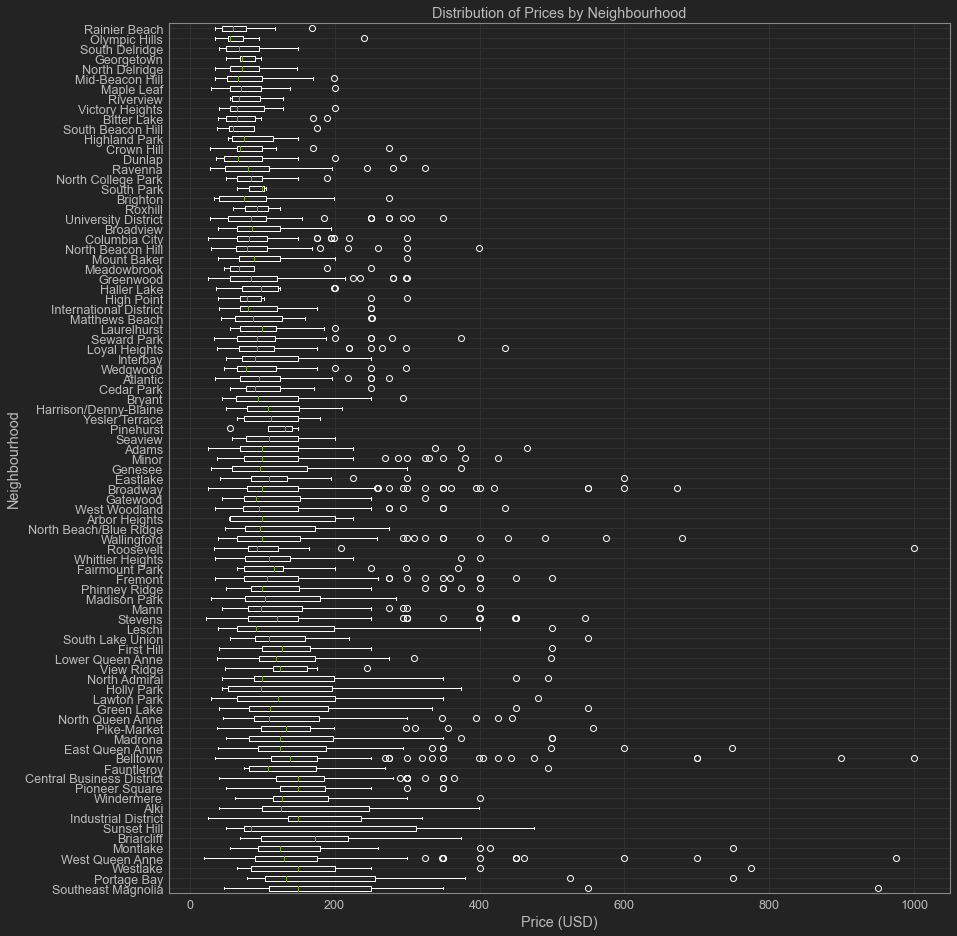

In [27]:
# Create function for drawing box plot (for later use)
def draw_boxplot(df, variable = 'price', group = 'neighbourhood_cleansed'):
    # Set fliers (outliers) colour to white
    flierprops = dict(markeredgecolor='white')
    # Initiate array for data of box plot
    box_data = []

    # For each neighbourhood, append to box_data the prices of all the corresponding properties
    for i, j in enumerate(neighbourhood_mean_price.index):
        query_string = group + ' == "' + j + '"'
        box_data.append(df.query(query_string)[variable])

    # Draw box plot using box_data
    bp = ax.boxplot(box_data, flierprops=flierprops, vert=False)

    # Set box features to white
    for key in ['boxes', 'whiskers', 'caps']:
        plt.setp(bp[key], color='white')

# Initiate figure
fig = plt.figure(figsize=(14, 16))
ax = plt.subplot(1, 1, 1)
# Draw box plot based on price
draw_boxplot(df_locations)

ax.set_yticklabels(neighbourhood_mean_price.index)
ax.set_xlabel('Price (USD)')
ax.set_ylabel('Neighbourhood')
ax.set_title('Distribution of Prices by Neighbourhood')

plt.show()

Note that the neighbourhoods are ordered 

Based on the above, we can see that the data appears to have a significant amount of high outliers. To make the distribution more balanced, I would like to take a look at distribution in the log scale:

In [28]:
# Add another column with log-10 transformation of the price
df_locations['log_price'] = np.log10(df_locations['price'])

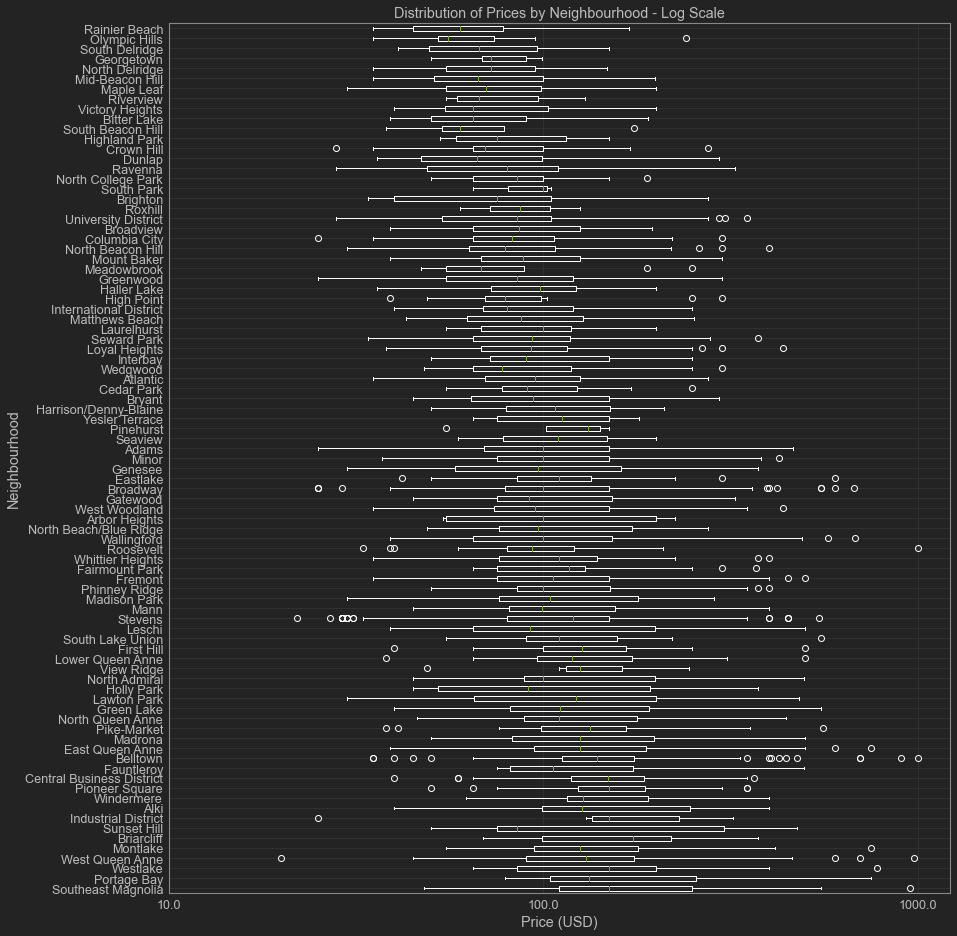

In [29]:
fig = plt.figure(figsize=(14, 16))
ax = plt.subplot(1, 1, 1)
# Draw box plot based on log_price
draw_boxplot(df_locations, variable='log_price')

ax.set_xticks(np.arange(1, 4))
ax.set_xticklabels(10.0**np.arange(1, 4))
ax.set_yticklabels(neighbourhood_mean_price.index)
ax.set_xlabel('Price (USD)')
ax.set_ylabel('Neighbourhood')
ax.set_title('Distribution of Prices by Neighbourhood - Log Scale')

plt.show()

Based on the above, we can see that certain neighbourhoods that have a significant amount of high outliers are ranked highly when comparing mean prices due to the outliers' effects on mean. Therefore, I believe median is a more indicative measure to use for comparison.

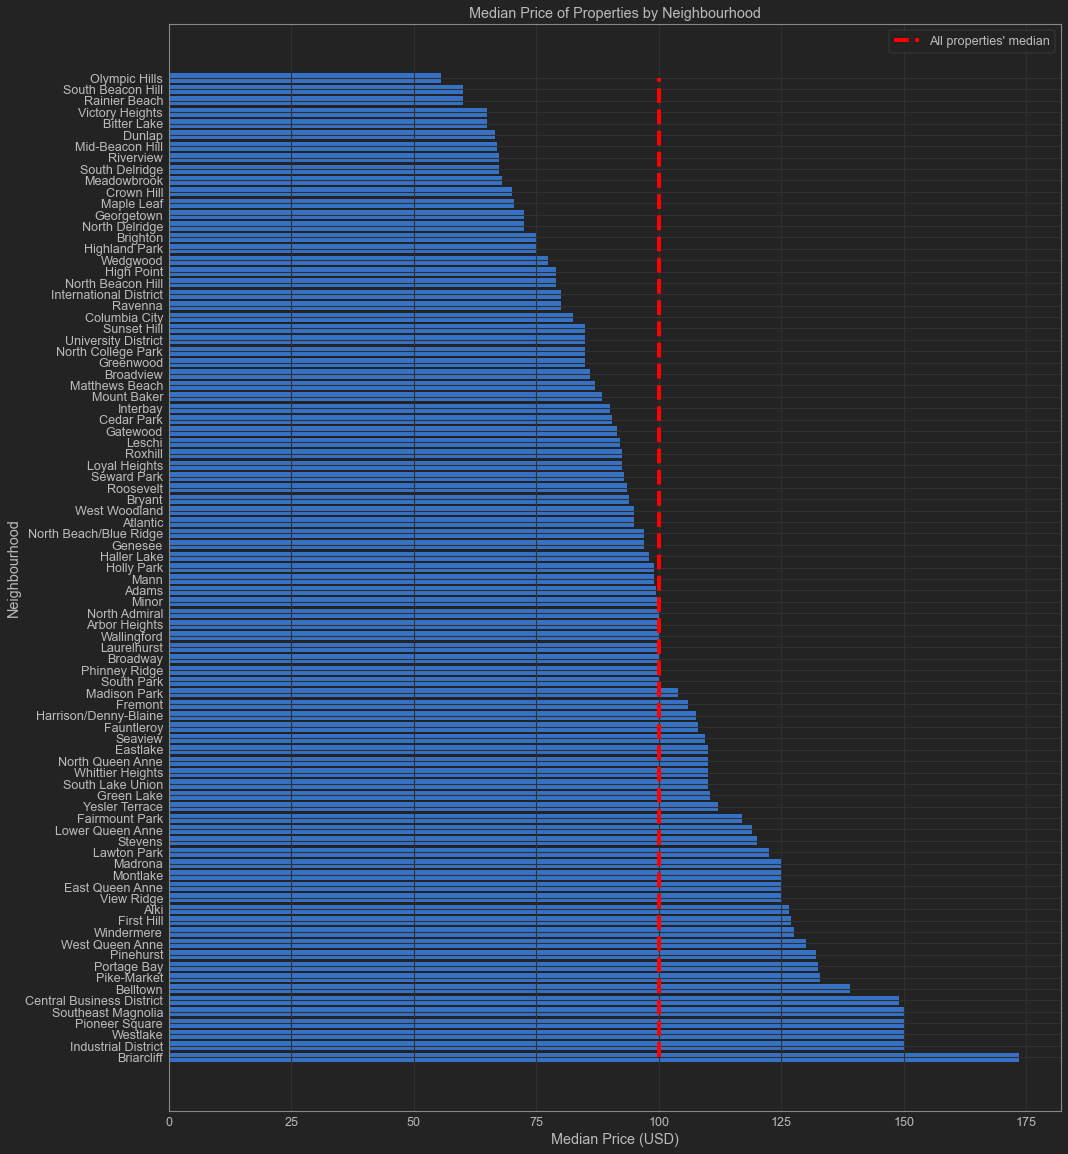

In [30]:
fig = plt.figure(figsize=(16, 20))
ax = plt.subplot(1, 1, 1)
# Draw horizontal bar chart of median prices
ax.barh(neighbourhood_med_price.index, width=neighbourhood_med_price.values)
ax.set_title('Median Price of Properties by Neighbourhood')
ax.set_xlabel('Median Price (USD)')
ax.set_ylabel('Neighbourhood')
# Plot median of all properties for reference
ax.plot(np.full(87, df_locations['price'].median()), np.arange(0, 87),
        color='red', label='All properties\' median', linewidth=4, linestyle='--')
plt.legend()
plt.show()

Based on the above, we can see that approx. 1/3 of neighbourhoods have higher average price than the total average, while the remaining neighbourhoods have close to or lower average prices than total average. This indicate that there is indeed a subset of neighbourhoods that are more pricy than others.

However, based on the above pattern, I also notice that there is a step-like shape to the data which indicates that average values are cluttering around certain points, which seem to imply that certain neighbourhoods have very small amounts of properties which is causing the shape. I confirm below:

In [31]:
# Get counts of properties from each neighbourhood
neighbourhood_count = df_locations.groupby('neighbourhood_cleansed')[
    'price'].count().sort_values(ascending=False)

neighbourhood_count

neighbourhood_cleansed
Broadway             397
Belltown             234
Wallingford          167
Fremont              158
Minor                135
                    ... 
Arbor Heights          5
South Beacon Hill      4
Pinehurst              4
South Park             3
Roxhill                2
Name: price, Length: 87, dtype: int64

In [32]:
# Number of neighbourhoods with 10 or less properties
(neighbourhood_count <= 10).sum()

15

Indeed, we can see that there are neighbourhoods with very small amounts of properties, with 15 neighbourhoods have 10 or less properties.

Additionally, the data with the full list of neighbourhoods is quite large and may not be the most effective at communicating a clear message. Therefore, it may be better to use the neighbourhood group data instead.

In [33]:
# Get counts of properties from each neighbourhood group
neighbourhood_group_count = df_locations.groupby('neighbourhood_group_cleansed')[
    'price'].count().sort_values(ascending=False)

neighbourhood_group_count

neighbourhood_group_cleansed
Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: price, dtype: int64

For neighbourhood groups, we see that the smallest group has 11 properties. It also appears to group other smaller neighbourhoods into Other Neighbourhoods. While the criteria for which neighbourhood qualifies as an "other" neighbourhood or not is unclear, I believe that this classification should be sufficient for this analysis.

In [34]:
# Get median of prices frome each neighbourhood group
neighbourhood_group_med_price = df_locations.groupby('neighbourhood_group_cleansed')[
    'price'].median().sort_values(ascending=False)

neighbourhood_group_med_price.head(10)

neighbourhood_group_cleansed
Downtown               139.0
Magnolia               129.0
Queen Anne             119.0
Cascade                115.0
West Seattle           109.0
Capitol Hill           105.0
Central Area           100.0
Other neighborhoods     99.0
Ballard                 95.0
Seward Park             93.0
Name: price, dtype: float64

The median prices of each neighbourhood group is calculated above and plotted as a bar chart below:

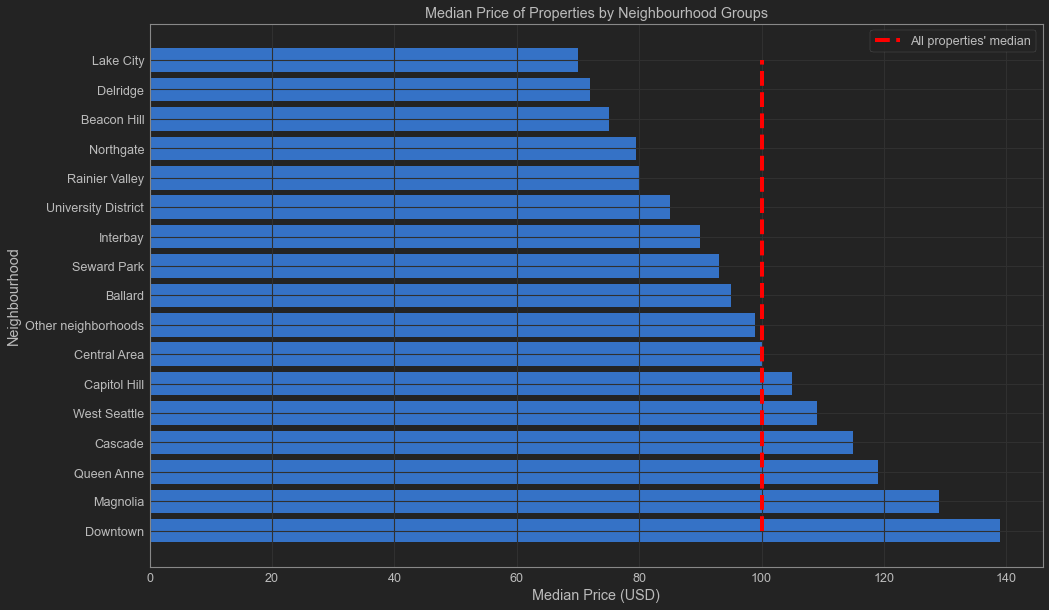

In [35]:
fig = plt.figure(figsize=(16, 10))
ax = plt.subplot(1, 1, 1)
# Plot bar chart of median prices of each neighbourhood group 
ax.barh(neighbourhood_group_med_price.index, width=neighbourhood_group_med_price.values)
ax.set_title('Median Price of Properties by Neighbourhood Groups')
ax.set_xlabel('Median Price (USD)')
ax.set_ylabel('Neighbourhood')
# Plot median of all properties for reference
ax.plot(np.full(17, df_locations['price'].median()), np.arange(0, 17),
        color='red', label='All properties\' median', linewidth=4, linestyle='--')
plt.legend()
plt.show()

From the above, we can see that 6 neighbourhood groups have higher average property prices than the total median. The total median of other neighbourhood groups is slighly lower than the total median, which would be expected if Other Neighbourhoods have an approximately equal distribution of more and less pricey neighbourhoods.

Based on the above, the most pricey neighbourhood is Downtown, followed by Magnolia and Queen Anne. The least pricey neighbourhoods are Lake City, followed by Delridge and Beacon Hill.

#### Question 2: Which locations have the highest rated properties?

Similarly to the previous question, I will focus on the neighbourhood groups rather than individual neighbourhoods.

In [36]:
# Get median review scores of each neighbourhood group
neighbourhood_group_med_rating = df_locations.groupby('neighbourhood_group_cleansed')[
    'review_scores_rating'].median().sort_values(ascending=False)

neighbourhood_group_med_rating.head(10)

neighbourhood_group_cleansed
West Seattle           97.0
Queen Anne             97.0
Central Area           97.0
Ballard                97.0
Rainier Valley         96.0
Other neighborhoods    96.0
Northgate              96.0
Magnolia               96.0
Interbay               96.0
Delridge               96.0
Name: review_scores_rating, dtype: float64

Unlike price, the difference between review score medians for each group appear to be very low (which we saw in the previous section that the top half of ratings is from 96 to 100 points). Therefore, the mean average may be more appropriate for this analysis.

In [37]:
# Get mean review scores of each neighbourhood group
neighbourhood_group_mean_rating = df_locations.groupby('neighbourhood_group_cleansed')[
    'review_scores_rating'].mean().sort_values(ascending=False)

neighbourhood_group_mean_rating.head(10)

neighbourhood_group_cleansed
Central Area           96.009404
West Seattle           95.864198
Delridge               95.861538
Ballard                95.533679
Queen Anne             95.443089
Seward Park            95.025641
Rainier Valley         94.731343
Northgate              94.692308
Other neighborhoods    94.562500
Lake City              94.375000
Name: review_scores_rating, dtype: float64

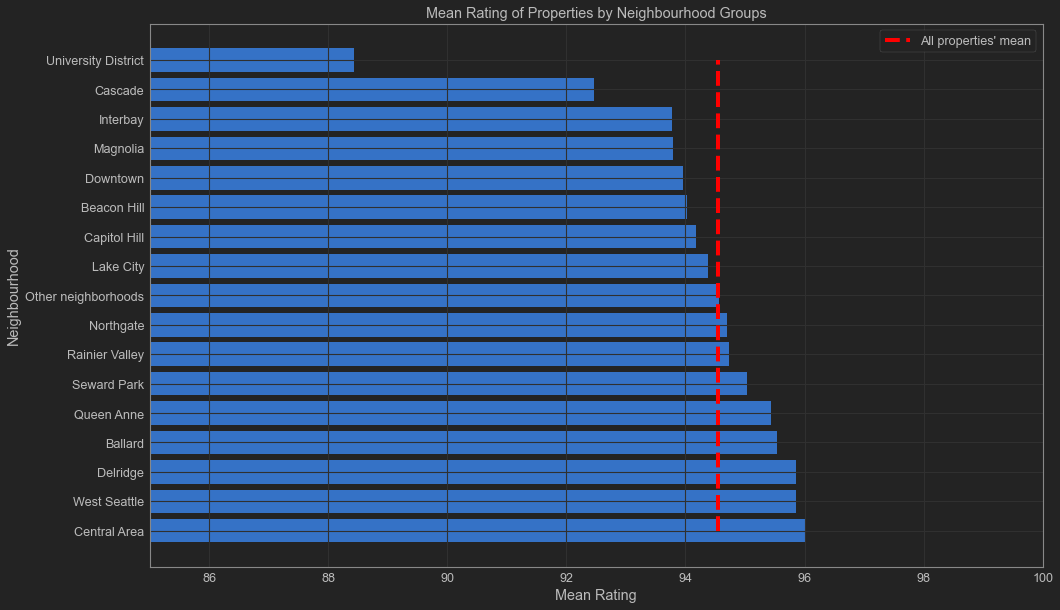

In [38]:
fig = plt.figure(figsize=(16, 10))
ax = plt.subplot(1, 1, 1)
# Plot bar chart with mean ratings by neighbourhood group
ax.barh(neighbourhood_group_mean_rating.index, width=neighbourhood_group_mean_rating.values)
ax.set_title('Mean Rating of Properties by Neighbourhood Groups')
ax.set_xlim(85, 100)
ax.set_xlabel('Mean Rating')
ax.set_ylabel('Neighbourhood')
# Plot mean line of all properties
ax.plot(np.full(17, df_locations['review_scores_rating'].mean()), np.arange(0, 17),
        color='red', label='All properties\' mean', linewidth=4, linestyle='--')
plt.legend()
plt.show()

From the above chart, we can see that 8 neighbourhood groups have higher-than-average ratings. Other neighbourhoods' average is close to the total average which is expected.

The highest-rated neighbourhood is Central Area, followed by West Seattle and Delridge. The lowest-rated is University District, followed by Cascade and Interbay. It is noticable that University District seems to be very lowly rated compared to others, around 4 points below the closest district.

#### Question 3: Do prices vary seasonally? In which periods are the prices highest or lowest?

##### Initial data preparation

For this question, I will take the average of all property prices on each date over the data's time period.

In [39]:
# Get mean price of all properties on each date
avg_price_by_date = df_calendar_clean.groupby('date')['price'].mean()
avg_price_by_date

date
2016-01-04    122.085879
2016-01-05    120.681307
2016-01-06    120.928258
2016-01-07    120.958896
2016-01-08    127.640853
                 ...    
2016-12-29    138.045503
2016-12-30    144.738380
2016-12-31    145.698146
2017-01-01    138.126968
2017-01-02    135.572767
Name: price, Length: 365, dtype: float64

##### Data visualisation and analysis

Firstly, I try to plot the data on a line chart:

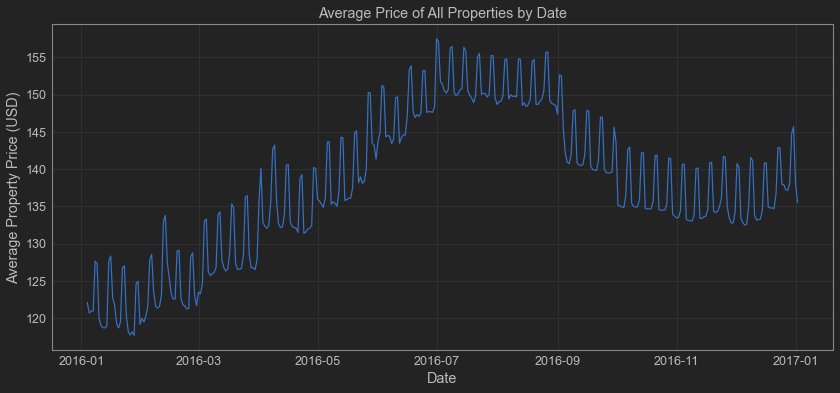

In [40]:
fig = plt.figure(figsize=(14, 6))
ax = plt.subplot(1, 1, 1)
# Plot line chart of daily average prices
ax.plot(avg_price_by_date)
ax.set_title('Average Price of All Properties by Date')
ax.set_xlabel('Date')
ax.set_ylabel('Average Property Price (USD)')
plt.show()

As seen above, it appears that, while there is an overall pattern in price change over the year, there is also a weekly effect where the prices appear to be higher during certain days of the week.

In order to see the long-term pattern more clearly, I will do a smoothing operation by taking the rolling average:

In [41]:
# Prepare a new datafrome for getting rolling average data
avg_price_rolling = pd.DataFrame(avg_price_by_date)
# Reset index to have dates on a column
avg_price_rolling = avg_price_rolling.reset_index()
# Rename column to be clearer
avg_price_rolling = avg_price_rolling.rename(columns={'price':'avg_price'})
avg_price_rolling

,date,avg_price
0,2016-01-04,122.085879
1,2016-01-05,120.681307
2,2016-01-06,120.928258
3,2016-01-07,120.958896
4,2016-01-08,127.640853
...,...,...
360,2016-12-29,138.045503
361,2016-12-30,144.738380
362,2016-12-31,145.698146
363,2017-01-01,138.126968


In [42]:
# Take 14-day rolling avearge (appears to gives a smoother looking curve than 7-day)
avg_price_rolling['rolling_avg_price'] = avg_price_rolling['avg_price'].rolling(14).mean()
avg_price_rolling

,date,avg_price,rolling_avg_price
0,2016-01-04,122.085879,NaN
1,2016-01-05,120.681307,NaN
2,2016-01-06,120.928258,NaN
3,2016-01-07,120.958896,NaN
4,2016-01-08,127.640853,NaN
...,...,...,...
360,2016-12-29,138.045503,137.974040
361,2016-12-30,144.738380,138.255414
362,2016-12-31,145.698146,138.602363
363,2017-01-01,138.126968,138.830434


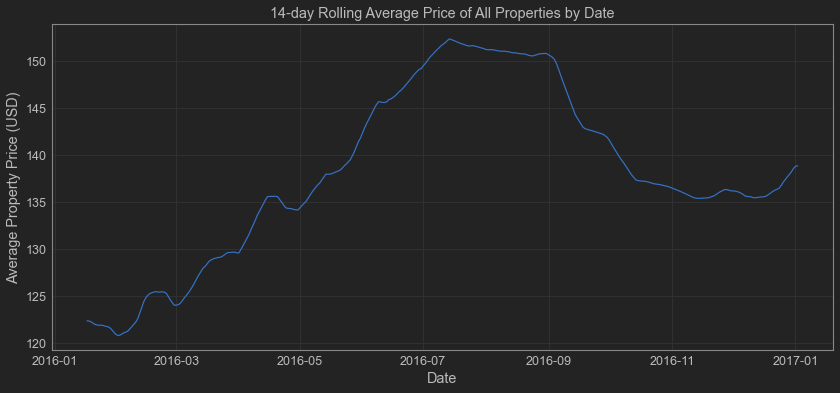

In [43]:
fig = plt.figure(figsize=(14, 6))
ax = plt.subplot(1, 1, 1)
# Plot rolling average price against date
ax.plot(avg_price_rolling['date'], avg_price_rolling['rolling_avg_price'])
ax.set_title('14-day Rolling Average Price of All Properties by Date')
ax.set_xlabel('Date')
ax.set_ylabel('Average Property Price (USD)')
plt.show()

Based on the above, we see a general uptrend in prices from January up to July. The price then appears to stay approximately the same and then falls significantly to December, then appears to start rising again close to the New Year.

It is interesting to note that the average price around January 2017 is significantly higher than in January 2016 (approx. 15 dollars higher), indicating that the average price has risen year-on-year.

The general price rising could be an effect of both the rising price trend in general, as well as possibly leading up to certain holidays, such as spring and summer holidays. The price falling around August may be due to the end of the summer holiday, and the price rising again close to the New Year could be due to the Christmas/New Year holiday.

For interest, I also try to take the average of price over each weekday to see the pattern of weekday on price:

In [44]:
# Get day of week (where 0 = Monday)
df_calendar_clean['weekday'] = df_calendar_clean['date'].dt.dayofweek
df_calendar_clean

,listing_id,date,available,price,weekday
0,241032,2016-01-04,True,85.0,0
1,241032,2016-01-05,True,85.0,1
2,241032,2016-01-06,False,NaN,2
3,241032,2016-01-07,False,NaN,3
4,241032,2016-01-08,False,NaN,4
...,...,...,...,...,...
1393565,10208623,2016-12-29,False,NaN,3
1393566,10208623,2016-12-30,False,NaN,4
1393567,10208623,2016-12-31,False,NaN,5
1393568,10208623,2017-01-01,False,NaN,6


In [45]:
# Get average of each day of the week
avg_price_by_weekday = df_calendar_clean.groupby('weekday')['price'].mean()
avg_price_by_weekday

weekday
0    135.676414
1    135.408764
2    135.447880
3    136.476032
4    143.036294
5    143.202136
6    136.459941
Name: price, dtype: float64

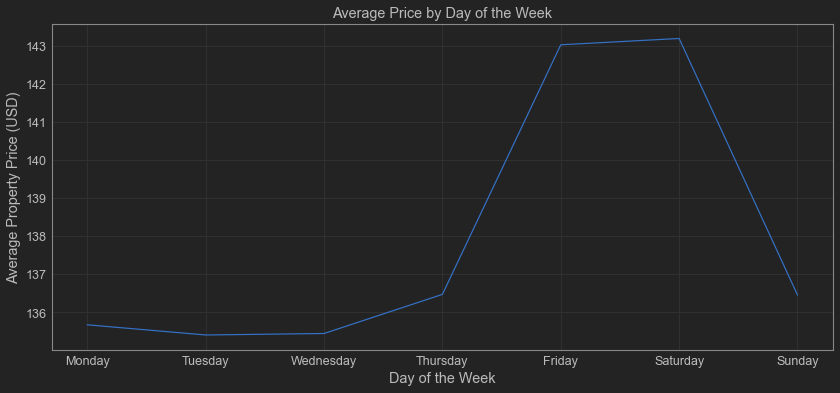

In [46]:
fig = plt.figure(figsize=(14, 6))
ax = plt.subplot(1, 1, 1)
# Plot line chart of average price by weekday
ax.plot(avg_price_by_weekday)
ax.set_title('Average Price by Day of the Week')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Average Property Price (USD)')
ax.set_xticks(np.arange(0,7))
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday',
                    'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

As seen above, Friday and Saturday have the highest average price - approximately 7 dollars higher than other day of the weeks. This seems to confirm that higher prices would generally be driven by holiday makers who would be more likely to stay on weekend nights.

#### Question 4: Can we predict the price of a property by its characteristics, and which characteristics have the highest correlation with price?

##### Initial data preparation:

In order to create a model that predicts the price of a property, firstly I will identify variables that are available which could potentially be used to predict property prices. Based on initial exploration, I believe that some potential explanatory variables are:

- neighbourhood_group_cleansed
- property_type	
- room_type
- accommodates (number of people the property accommodates)
- bathrooms (number of)
- bedrooms (number of)
- beds (number of)
- bed_type
- square_feet
- review_scores_rating

Firstly, we extract a copy of df_listings with only the dependant variable (price) and the aforementioned variables in order to inspect the data and convert them to the necessary format:

In [47]:
# Create new dataframe with dependent and explanatory variables to be used
df_price_predict = df_listings[['price', 'neighbourhood_group_cleansed', 'property_type',
                                'room_type', 'accommodates', 'bathrooms', 'bedrooms',
                                'beds', 'bed_type', 'square_feet', 'review_scores_rating']].copy()
df_price_predict

,price,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,review_scores_rating
0,$85.00,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,NaN,95.0
1,$150.00,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,NaN,96.0
2,$975.00,Queen Anne,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,NaN,97.0
3,$100.00,Queen Anne,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,NaN,NaN
4,$450.00,Queen Anne,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,NaN,92.0
...,...,...,...,...,...,...,...,...,...,...,...
3813,$359.00,Other neighborhoods,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,NaN,80.0
3814,$79.00,Capitol Hill,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,NaN,100.0
3815,$93.00,Rainier Valley,House,Entire home/apt,2,1.0,1.0,1.0,Real Bed,NaN,NaN
3816,$99.00,Capitol Hill,Condominium,Entire home/apt,2,1.0,0.0,1.0,Real Bed,NaN,NaN


In [48]:
# Price still in string format so convert using earlier method
df_price_predict['price'] = df_price_predict['price'].str.replace(
    '$', '').str.replace(',', '').astype(float)

In [49]:
df_price_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         3818 non-null   float64
 1   neighbourhood_group_cleansed  3818 non-null   object 
 2   property_type                 3817 non-null   object 
 3   room_type                     3818 non-null   object 
 4   accommodates                  3818 non-null   int64  
 5   bathrooms                     3802 non-null   float64
 6   bedrooms                      3812 non-null   float64
 7   beds                          3817 non-null   float64
 8   bed_type                      3818 non-null   object 
 9   square_feet                   97 non-null     float64
 10  review_scores_rating          3171 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 328.2+ KB


Based on the above, we see that, from the explanatory variables, 6 are numerical and 4 are categorical.

Of the numerical data, there are certain columns with missing values. In order to use this, we need to fill in the missing data. For doing the model, we could use the mean of the column.

However, square feet size information appears to be quite rare, which may cause be an issue when using as an explanatory variable. Perhaps another engineered categorical variable to indicate whether a property has its square feet listed or not may have a better explanatory power?

In [50]:
# Create copy for cleaning
df_price_predict_clean = df_price_predict.copy()

# Fill na in numerical columns with their means
for col in ['bathrooms', 'bedrooms', 'beds', 'square_feet', 'review_scores_rating']:
    df_price_predict_clean[col] = df_price_predict_clean[col].fillna(df_price_predict[col].mean())

In [51]:
df_price_predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         3818 non-null   float64
 1   neighbourhood_group_cleansed  3818 non-null   object 
 2   property_type                 3817 non-null   object 
 3   room_type                     3818 non-null   object 
 4   accommodates                  3818 non-null   int64  
 5   bathrooms                     3818 non-null   float64
 6   bedrooms                      3818 non-null   float64
 7   beds                          3818 non-null   float64
 8   bed_type                      3818 non-null   object 
 9   square_feet                   3818 non-null   float64
 10  review_scores_rating          3818 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 328.2+ KB


In [52]:
# Create dummy variable for if sq. feet data is available (True if available)
df_price_predict_clean['sq_feet_data_available'] = ~df_price_predict['square_feet'].isna()

For categorical variables, we will engineer dummy variable columns for each. property_type has a missing data so the missing data will need to be filled in. (In this case we will fill in with the mode.) I will explore each of the variables to see if they need any further cleaning:

In [53]:
df_price_predict.groupby('property_type')['price'].count().sort_values(ascending=False)

property_type
House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: price, dtype: int64

In [54]:
df_price_predict.groupby('room_type')['price'].count().sort_values(ascending=False)

room_type
Entire home/apt    2541
Private room       1160
Shared room         117
Name: price, dtype: int64

In [55]:
df_price_predict.groupby('bed_type')['price'].count().sort_values(ascending=False)

bed_type
Real Bed         3657
Futon              74
Pull-out Sofa      47
Airbed             27
Couch              13
Name: price, dtype: int64

For property type and bed type, there are 3,817 data while the number of rows is 3,818, meaning there is a row with missing data. Room type and bed types have data for all rows. I will fill in the missing data with the mode of the column and I will need to remove 1 dummy column before running a regression analysis.

In [56]:
# Fill empty property types with the mode
df_price_predict_clean['property_type'] = df_price_predict_clean['property_type'].fillna(
    df_price_predict['property_type'].mode())

In [57]:
# Create dummy variable columns, dropping one variable for each dummy set
property_type_dummies = pd.get_dummies(
    df_price_predict['property_type'], prefix='property_type', drop_first=True)
room_type_dummies = pd.get_dummies(
    df_price_predict['room_type'], prefix='room_type', drop_first=True)
bed_type_dummies = pd.get_dummies(
    df_price_predict['bed_type'], prefix='bed_type', drop_first=True)
neighbourhood_group_cleansed_dummies = pd.get_dummies(
    df_price_predict['neighbourhood_group_cleansed'], prefix='neighbourhood_group_cleansed',
    drop_first=True)

# Drop original categorical columns
df_price_predict_clean = df_price_predict_clean.drop(
    columns=['property_type', 'bed_type', 'room_type', 'neighbourhood_group_cleansed'])

# Join dummy columns into main dataframe
df_price_predict_clean = df_price_predict_clean.join(property_type_dummies)
df_price_predict_clean = df_price_predict_clean.join(bed_type_dummies)
df_price_predict_clean = df_price_predict_clean.join(room_type_dummies)
df_price_predict_clean = df_price_predict_clean.join(neighbourhood_group_cleansed_dummies)

In the above cell, I create the corresponding dummy variables while dropping a column each for room type and bed type as discussed earlier. The original columns are dopped from the dataframe and the dummy columns are added to the data frame accordingly.

In [58]:
# Create X and y dataframes
X = df_price_predict_clean.drop(columns=['price'])
y = df_price_predict_clean['price']

# Add constant term
X = sm.add_constant(X)

The explanatory variables are assigend to the X dataframe and the price is assigned to the y dataframe. A constant is added to the X dataframe.

##### Create and analyse model

Firstly, I perform an OLS regression on X and y in order to get an idea of how significant the different variables are in explaining the price:

In [59]:
# Create OLS model from y and X. Relevant columns in X converted to float to avoid type error
mod = sm.OLS(y, X.astype('float'))
# Get result from fitting model
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     115.7
Date:                Sat, 17 Apr 2021   Prob (F-statistic):               0.00
Time:                        05:47:28   Log-Likelihood:                -20978.
No. Observations:                3818   AIC:                         4.205e+04
Df Residuals:                    3773   BIC:                         4.233e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

Based on the above regression results in the P>|t| column, we see that most of the coefficients to the numerical variables are quite significant. The one that appears to not be very significant is the number of beds, which has a 52.8% chance of not being significant.

For the categorical variables, while certain categories in each variables have low P>|t|, every variables, except bed type, have certain categories which appear to be significant in explaining price. For example, the Boat property type and the Dorm property type seem to have very low chance of not being significant, while the other property type categories do not have high significance.

Based on the R-squared test, the model appears to explain 57.4% of dependent variable, which is significant although it could be further improved.

Based on the Cond. No. test statistic which is very high, it appears to show that the model has high multicollinearity which implies that many of the explanatory variables are correlated to each other. This will be explored later.

Next, I would like to try to remove variables which do not appear to be significant to the model and see how it affects the model's performance, with cut-off P value at 0.5:

In [60]:
X2 = X.drop(columns=['beds', 'property_type_Chalet',
                     'property_type_Other', 'property_type_Tent', 'property_type_Townhouse',
                     'property_type_Yurt', 'bed_type_Couch', 'bed_type_Futon', 
                     'bed_type_Pull-out Sofa', 'bed_type_Real Bed', 
                     'neighbourhood_group_cleansed_Central Area', 
                     'neighbourhood_group_cleansed_Interbay',
                     'neighbourhood_group_cleansed_Other neighborhoods',
                     'neighbourhood_group_cleansed_University District'])

In [61]:
mod = sm.OLS(y, X2.astype('float'))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     170.1
Date:                Sat, 17 Apr 2021   Prob (F-statistic):               0.00
Time:                        05:47:28   Log-Likelihood:                -20979.
No. Observations:                3818   AIC:                         4.202e+04
Df Residuals:                    3787   BIC:                         4.221e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

As seen above, this does not appear to significantly affect the R-squared value of the model.

Furthermore, I'd like to explore what would happen if multi-collinearity of the model could be reduced. Firstly, let us explore the correlations between different numeric variables, both graphically and with correlation value:

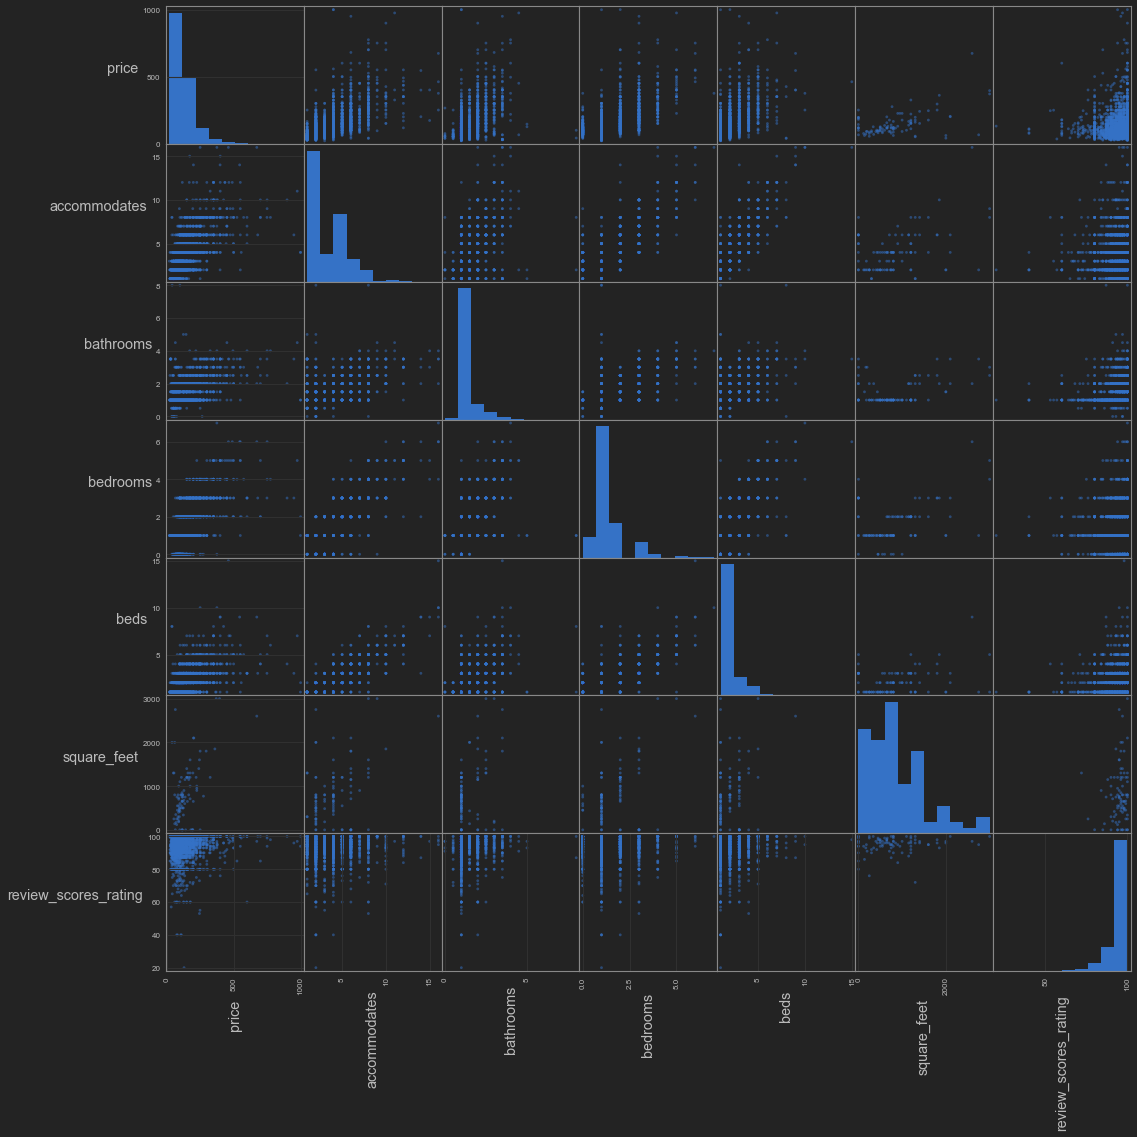

In [62]:
numeric_vars = ['price', 'accommodates', 'bathrooms',
                'bedrooms', 'beds', 'square_feet',
                'review_scores_rating']

axes = pd.plotting.scatter_matrix(df_price_predict[numeric_vars], figsize=(16, 16))

# Rotate labels for easier reading. Code taken from:
# https://stackoverflow.com/questions/58623528/pandas-scatter-matrix-labels-vertical-x-and-horizontal-y-without-being-cut
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()


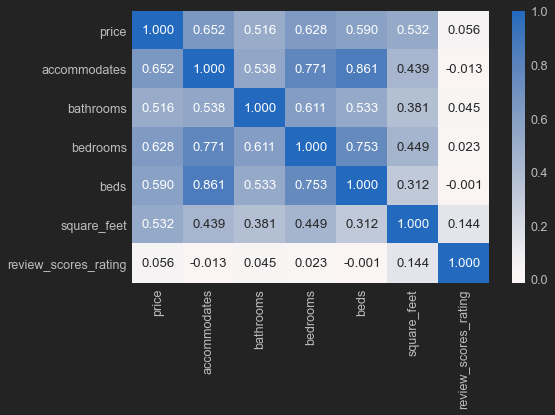

In [63]:
plt.figure(figsize=[8, 5])
sns.heatmap(df_price_predict[numeric_vars].corr(), annot=True, fmt='.3f',
            cmap='vlag_r', center=0)
plt.show()

As seen above, number of people accommodated, and number of bathrooms, bedrooms, beds, and square feet are all correlated. This would make sense as larger properties would tend to have higher number of occupancy number and facilities as well. Only the review scores appear to be independent to the other numerical factors.

Next, I'd like to explore what would be the effect of attempting to reduce multicollinearity by removing factors that are correlated to each other. In the above correlation matrix, we can see that the number of people accommodated is the factor with the highest correlation to price. Let us explore how well the model performs with the other correlated variables removed:

In [64]:
X3 = X2.drop(columns=['bathrooms', 'bedrooms', 'square_feet'])

In [65]:
mod = sm.OLS(y, X3.astype('float'))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     139.6
Date:                Sat, 17 Apr 2021   Prob (F-statistic):               0.00
Time:                        05:47:31   Log-Likelihood:                -21290.
No. Observations:                3818   AIC:                         4.264e+04
Df Residuals:                    3790   BIC:                         4.281e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

While multicollinearity decrease, it can also be seen that R-squared also significantly decreased. As the main purpose of the model is to predict the property price, and it appears that all the aforementioned numerical factors contribute to the price, it would appear to be more reasonable to include the terms despite their correlations.

Next, we will split the data into training and testing sets in order to test the prediction performance of the model:

In [66]:
# Split into train and test data with test size of 25% and fixed random state
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = .25, random_state=1) 

In [67]:
# Instantiate model and fit
lm_model = LinearRegression(normalize=True)  
lm_model.fit(X_train, y_train)  

# Get predictions from test and training data
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

# Get scores for test and training data
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(
    train_score, test_score))

The rsquared on the training data was 0.5830330511126054.  The rsquared on the test data was 0.5363833046214115.


Based on the above, the training score was approximately 58% while the testing score was 54%, which is expected based on the earlier OLS model.

Next, we explore the coefficients of the model to see which ones have the most effects on the price:

In [68]:
# Create a coefficient dataframe and retrieve coefficient names, value and absolute values
coefs_df = pd.DataFrame()
coefs_df['est_int'] = X_train.columns
coefs_df['coefs'] = lm_model.coef_
coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
# Sort by absolute value
coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)

In [69]:
coefs_df.head(10)

,est_int,coefs,abs_coefs
8,property_type_Boat,135.583725,135.583725
18,room_type_Shared room,-66.069656,66.069656
13,property_type_Dorm,-59.883207,59.883207
11,property_type_Camper/RV,47.365391,47.365391
23,neighbourhood_group_cleansed_Downtown,41.457509,41.457509
21,neighbourhood_group_cleansed_Cascade,39.047032,39.047032
16,property_type_Treehouse,37.843083,37.843083
17,room_type_Private room,-33.789735,33.789735
27,neighbourhood_group_cleansed_Queen Anne,31.579832,31.579832
2,bathrooms,31.136401,31.136401


As we can see, the coefficient that appears to affect the price the most is Boat property type, which increases price by over 135 dollar over the default property type with is Apartment.

The second strongest coefficient is Shared room type. The default room type in this model is entire home/apartment, so property being shared room reduces price by over 66 dollars. The third strongest coefficient is Dorm type, which reduces price by over 59 dollars over Apartment type.

In the top 10 strongest coefficients, the most common class is property types, with 3 property types (Boat, Camper/RV, and Treehouse) having positive effect on the price and 1 property type (Dorm) having a negative effect. Boat seems to make sense as it is a luxury type of property which would command more premium, as well as Dorm which appears to be a more budget option and therefore would tend to be cheaper. Camper/RV and Treehouse are somewhat surprising as I expected them to be more "rough and tumble" choices. I will explore this in more detail later.

Both room type variables, Shared room and Private Room, have negative effect on the price. This is somewhat expected as the default value is Entire house/Apartment, which we would expect to be more expensive than rooms.

3 neighbourhood factors also appear in the top 10 which all have positive values, including Downtown, Cascade and Queen Anne. These are certainly expected as all 3 of their neighbourhoods appear in the top 4 most expensive neighbourhoods.

The last variable in top 10 is bathrooms which has a positive effect, which is again expected.

In order to get more understanding regarding the effects of types of properties, I try to look at the average numbers of bedrooms and bathrooms for each property type:

In [70]:
# Get means of number of bedrooms of each type of property:
property_types_mean_bedrooms = df_listings.groupby('property_type')[
    'bedrooms'].mean().sort_values(ascending=False)

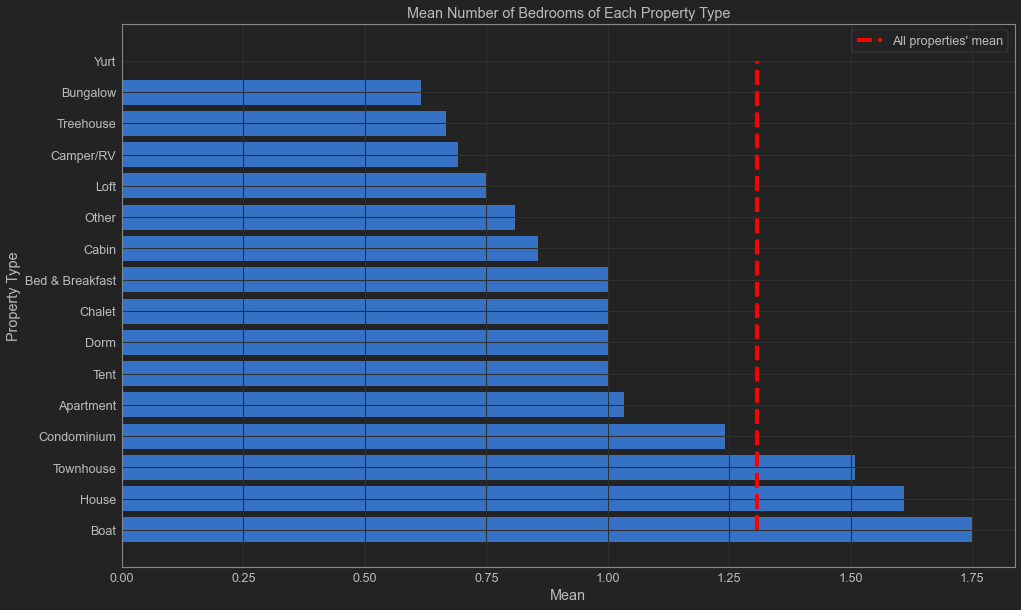

In [71]:
fig = plt.figure(figsize=(16, 10))
ax = plt.subplot(1, 1, 1)
ax.barh(property_types_mean_bedrooms.index, width=property_types_mean_bedrooms.values)
ax.set_title('Mean Number of Bedrooms of Each Property Type')
ax.set_xlabel('Mean')
ax.set_ylabel('Property Type')
ax.plot(np.full(16, df_listings['bedrooms'].mean()), np.arange(0, 16),
        color='red', label='All properties\' mean', linewidth=4, linestyle='--')
plt.legend()
plt.show()

In [72]:
# Get means of number of bathrooms of each type of property:
property_types_mean_bathrooms = df_listings.groupby('property_type')[
    'bathrooms'].mean().sort_values(ascending=False)

property_types_mean_bathrooms.head(10)

property_type
Dorm               4.000000
Boat               1.750000
Bed & Breakfast    1.648649
Townhouse          1.550847
Other              1.409091
House              1.399652
Condominium        1.225275
Bungalow           1.192308
Loft               1.125000
Apartment          1.096357
Name: bathrooms, dtype: float64

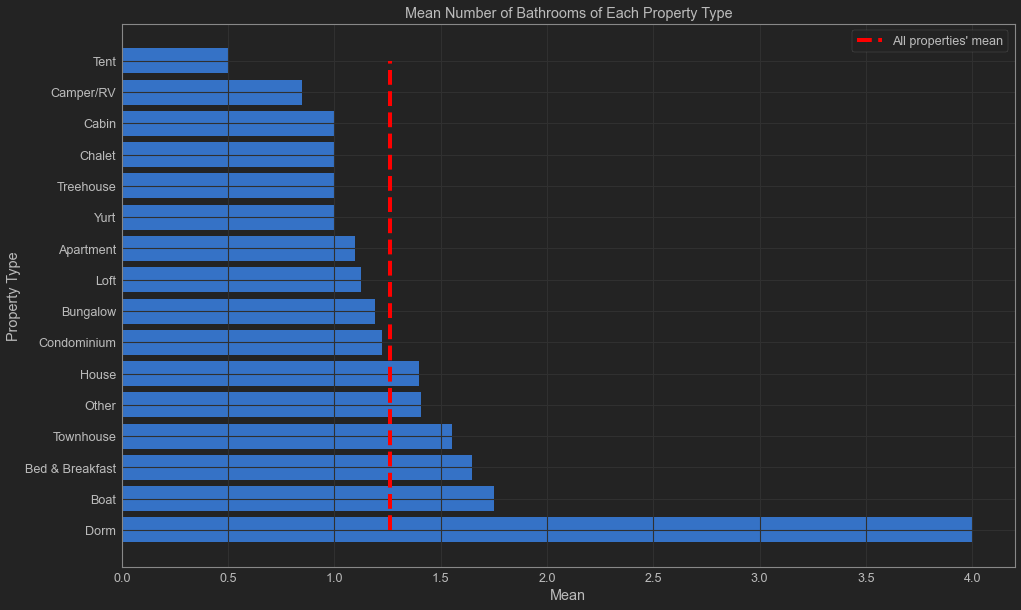

In [73]:
fig = plt.figure(figsize=(16, 10))
ax = plt.subplot(1, 1, 1)
ax.barh(property_types_mean_bathrooms.index, width=property_types_mean_bathrooms.values)
ax.set_title('Mean Number of Bathrooms of Each Property Type')
ax.set_xlabel('Mean')
ax.set_ylabel('Property Type')
ax.plot(np.full(16, df_listings['bathrooms'].mean()), np.arange(0, 16),
        color='red', label='All properties\' mean', linewidth=4, linestyle='--')
plt.legend()
plt.show()

Based on the above, we can see that dorms have a large amount of bedrooms on average - around 4 - while the average property has 1.25 bathrooms. This explains why the negative coefficient to the Dorm variable is so high, as the model adjusts the price down to compensate for the high value contributed by the bathrooms variable.

Both Camper/RV and Treehouse have lower than average number of bedrooms and bathrooms, which partially explain the positive coefficient to the property type variables. Furthermore, looking at the descriptions of the relevant properties, they appear to be boutique, higher-end properties (such as renovated retro camper vans), so the positive effect does make sense.

#### Question 5: Can we predict the average user rating of a property by its characteristics, and which characteristics have the highest correlation with rating?

Similarly to Question 4, I want to see how the previously identified factors could potentially be used in creating a model to predict a property's rating:

In [74]:
X = df_price_predict_clean.drop(columns=['review_scores_rating'])
y = df_price_predict_clean['review_scores_rating']

X = sm.add_constant(X)

In [75]:
# Create OLS model from y and X. Relevant columns in X converted to float to avoid type error
mod = sm.OLS(y, X.astype('float'))
# Get result from fitting model
res = mod.fit()
print(res.summary())

                             OLS Regression Results                             
Dep. Variable:     review_scores_rating   R-squared:                       0.046
Model:                              OLS   Adj. R-squared:                  0.035
Method:                   Least Squares   F-statistic:                     4.111
Date:                  Sat, 17 Apr 2021   Prob (F-statistic):           5.64e-18
Time:                          05:47:32   Log-Likelihood:                -12181.
No. Observations:                  3818   AIC:                         2.445e+04
Df Residuals:                      3773   BIC:                         2.473e+04
Df Model:                            44                                         
Covariance Type:              nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

Unlike the previous model, the R-squared is very low, implying that the model doesn't have a good performance in predicting the rating of a property.

I try dropping variables with coefficients with P values higher than 0.5 to see if it makes a difference:

In [76]:
X2 = X.drop(columns=['bedrooms', 'beds', 'sq_feet_data_available', 
                     'property_type_Bed & Breakfast', 'property_type_Boat',
                     'property_type_Bungalow', 'property_type_Cabin', 'property_type_Camper/RV',
                     'property_type_Condominium', 'property_type_Dorm', 'property_type_House',
                     'property_type_Loft',
                     'property_type_Other', 'property_type_Tent', 'property_type_Townhouse', 
                     'property_type_Treehouse',
                     'property_type_Yurt', 'bed_type_Couch', 'bed_type_Futon',
                     'bed_type_Pull-out Sofa', 'bed_type_Real Bed', 'room_type_Private room',
                     'neighbourhood_group_cleansed_Delridge',
                     'neighbourhood_group_cleansed_Northgate',
                     'neighbourhood_group_cleansed_Queen Anne',
                     'neighbourhood_group_cleansed_Seward Park', 
                     'neighbourhood_group_cleansed_West Seattle'])

In [77]:
# Create OLS model from y and X. Relevant columns in X converted to float to avoid type error
mod = sm.OLS(y, X2.astype('float'))
# Get result from fitting model
res = mod.fit()
print(res.summary())

                             OLS Regression Results                             
Dep. Variable:     review_scores_rating   R-squared:                       0.042
Model:                              OLS   Adj. R-squared:                  0.038
Method:                   Least Squares   F-statistic:                     9.778
Date:                  Sat, 17 Apr 2021   Prob (F-statistic):           6.77e-26
Time:                          05:47:32   Log-Likelihood:                -12189.
No. Observations:                  3818   AIC:                         2.441e+04
Df Residuals:                      3800   BIC:                         2.453e+04
Df Model:                            17                                         
Covariance Type:              nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

As expected, it does not seem to make much difference.

Just to explore, I will try to add some information for the host of the properties and see if such information may help to determine a listing's rating. These are:

- Length of time host has been on platform (to be engineered from host_since deducted from latest date)
- host_response_time
- host_response_rate
- host_acceptance_rate
- host_is_superhost
- host_listings_count
- host_has_profile_pic
- host_identity_verified

So firstly the above information will need to be cleaned accordingly

In [78]:
# Create new dataframe for this analysis
df_rating_predict = pd.DataFrame()

# Convert host_since from string to datetime
df_rating_predict['host_since'] = pd.to_datetime(df_listings['host_since'])
# Get number of days host has been host for by deducting "current" date by date of host_since
df_rating_predict['host_for'] = pd.to_datetime('2017-01-02') - df_rating_predict['host_since']
# Convert to float
df_rating_predict['host_for'] = df_rating_predict['host_for'].dt.days
df_rating_predict = df_rating_predict.drop(columns=['host_since'])

I try to plot host_for on a histogram to see how the data are distributed:

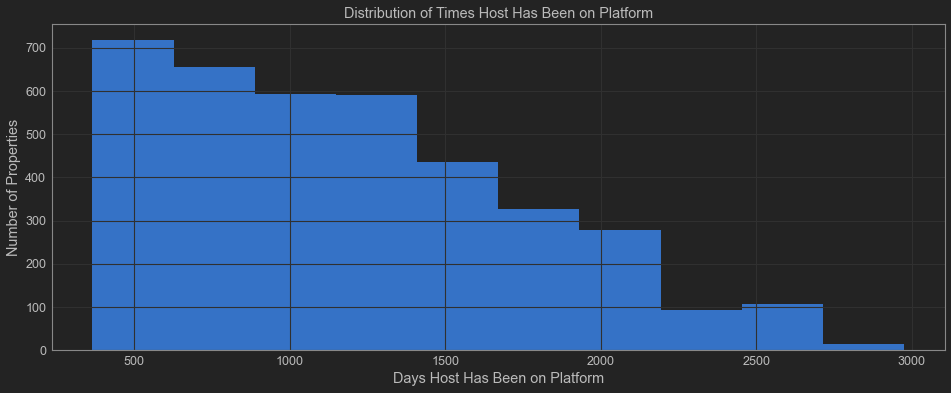

In [79]:
fig = plt.figure(figsize=(16, 6))
ax = plt.subplot(1, 1, 1)
ax.hist(df_rating_predict['host_for'])
ax.set_title('Distribution of Times Host Has Been on Platform')
ax.set_xlabel('Days Host Has Been on Platform')
ax.set_ylabel('Number of Properties')
plt.show()

As seen above, the distribution of host_for appears to be roughly linear.

For host response time, we need to convert to dummy variables. There are n/a values so I may need to fill in the empty values for certain variables:

In [80]:
df_listings.groupby('host_response_time')['price'].count()

host_response_time
a few days or more      38
within a day           597
within a few hours     968
within an hour        1692
Name: price, dtype: int64

For host response time, I assume that the empty values are hosts who have not yet responded to enquiries to have such data recorded. I will fill the missing values with the mode ('within a few hours'), and also create a separate variable to track which rows have missing data for this column:

In [81]:
# Fill n/a with the mode
df_rating_predict['host_response_time'] = df_listings['host_response_time'].fillna(
    df_listings['host_response_time'].mode())

# Get dummies from response time variables
host_response_time_dummies = pd.get_dummies(
    df_rating_predict['host_response_time'], prefix='host_response_time', drop_first=True)
# Join to variables dataframe to be used for the model
df_rating_predict = df_rating_predict.join(host_response_time_dummies)
# Drop the original column
df_rating_predict.drop(columns=['host_response_time'], inplace=True)

# Make variable which is True if host response time has missing data
df_rating_predict['host_response_time_missing_data'] = df_listings['host_response_time'].isna()

In [82]:
df_listings.groupby('host_response_rate')['price'].count().sort_values(ascending=False).head(10)

host_response_rate
100%    2371
90%      165
80%      104
99%       78
88%       66
50%       52
94%       46
67%       41
89%       32
75%       32
Name: price, dtype: int64

For host response rate, the number of empty entries are the same as host response time, so the reason for missing data is likely the same. As it is a numerical data, I will need to fill in the empty data. As the host response time variable will represent hosts that have not responded, the previously created host_response_time_missing_data will already track this.

In [83]:
# Remove % sign and convert to string
df_rating_predict['host_response_rate'] = df_listings['host_response_rate'].str.replace(
    '%', '').astype(float)

# Fill n/a with mean of column
df_rating_predict['host_response_rate'] = df_rating_predict['host_response_rate'].fillna(
    df_rating_predict['host_response_rate'].mean())

Next, we look at the acceptance rate:

In [84]:
df_listings.groupby('host_acceptance_rate')['price'].count().sort_values(ascending=False).head(10)

host_acceptance_rate
100%    3044
0%         1
Name: price, dtype: int64

Interestingly, acceptance rate is mostly 100%, with 1 entry with 0% and the remaining are empty values. Since there is only one entry with 0% while the remaining available data is 100%, the actual numerical data does not seem to be useful.

Nevertheless, let us inspect the entry with 0% rate:

In [85]:
df_listings[df_listings['host_acceptance_rate'] == '0%']

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
2920,4464795,https://www.airbnb.com/rooms/4464795,20160104002432,2016-01-04,Queen Hide-A-Bed - Capitol Hill,This listing is for use of a couch that pulls ...,Great view of downtown from the unit. Access ...,This listing is for use of a couch that pulls ...,none,This condo has great access to downtown (2 blo...,NaN,Bus stops less than a block away. Light rail ...,https://a2.muscache.com/ac/pictures/56081084/5...,https://a2.muscache.com/im/pictures/56081084/5...,https://a2.muscache.com/ac/pictures/56081084/5...,https://a2.muscache.com/ac/pictures/56081084/5...,23165079,https://www.airbnb.com/users/show/23165079,Jared,2014-10-30,"Seattle, Washington, United States",NaN,within a day,100%,0%,f,https://a2.muscache.com/ac/users/23165079/prof...,https://a2.muscache.com/ac/users/23165079/prof...,Capitol Hill,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Bellevue Avenue East, Seattle, WA 98102, Unite...",Capitol Hill,Broadway,Capitol Hill,Seattle,WA,98102,Seattle,"Seattle, WA",US,United States,47.617641,-122.327704,t,Apartment,Shared room,2,1.0,1.0,1.0,Pull-out Sofa,"{""Wireless Internet"",""Air Conditioning"",Kitche...",NaN,$95.00,NaN,NaN,$100.00,$20.00,1,$0.00,3,1125,5 months ago,t,30,60,90,365,2016-01-04,6,2015-01-19,2015-08-31,100.0,9.0,10.0,10.0,10.0,10.0,9.0,f,NaN,WASHINGTON,t,moderate,f,f,1,0.51


Still unclear why this entry is the odd one out. Regardless, I will create a dummy variable that tracks whether an entry has a host_acceptance_rate value to see if there is any significance in the model:

In [86]:
# Create dummy variable which is True if host acceptance rate is missing
df_rating_predict['host_acceptance_rate_missing'] = df_listings['host_response_time'].isna()

Next, we look at superhost status:

In [87]:
df_listings.groupby('host_is_superhost')['price'].count().sort_values(ascending=False).head(10)

host_is_superhost
f    3038
t     778
Name: price, dtype: int64

The values are true and false. There are 2 missing values, which seems strange since a host should either be a superhost or not. Let us inspect the 2 entries to see what is the issue:

In [88]:
df_listings[df_listings['host_is_superhost'].isna()]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1297,8354452,https://www.airbnb.com/rooms/8354452,20160104002432,2016-01-04,The View | Be Inspired in Seattle,A studio with stunning waterfront view worth t...,Looking for that perfect spot to take-in all o...,A studio with stunning waterfront view worth t...,none,This spot is in Belltown across the street fro...,Please accept my apologies for not being able ...,Seattle has a lot of transportation options in...,https://a2.muscache.com/ac/pictures/6d46a5de-9...,https://a2.muscache.com/im/pictures/6d46a5de-9...,https://a2.muscache.com/ac/pictures/6d46a5de-9...,https://a2.muscache.com/ac/pictures/6d46a5de-9...,42515980,https://www.airbnb.com/users/show/42515980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,"Western Avenue, Seattle, WA 98121, United States",Belltown,Belltown,Downtown,Seattle,WA,98121,Seattle,"Seattle, WA",US,United States,47.616705,-122.353969,t,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,$99.00,$725.00,NaN,NaN,$25.00,1,$25.00,2,13,2 months ago,t,30,60,89,89,2016-01-04,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN
1419,10235014,https://www.airbnb.com/rooms/10235014,20160104002432,2016-01-04,Luxury Apartment in Belltown / SLU,Beautiful building near the heart of downtown ...,NaN,Beautiful building near the heart of downtown ...,none,NaN,NaN,NaN,https://a2.muscache.com/ac/pictures/2644576c-4...,https://a2.muscache.com/im/pictures/2644576c-4...,https://a2.muscache.com/ac/pictures/2644576c-4...,https://a2.muscache.com/ac/pictures/2644576c-4...,1075031,https://www.airbnb.com/users/show/1075031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,"6th Avenue, Seattle, WA 98121, United States",Belltown,Belltown,Downtown,Seattle,WA,98121,Seattle,"Seattle, WA",US,United States,47.615974,-122.340537,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$250.00,"$1,200.00","$3,600.00",NaN,NaN,1,$0.00,1,1125,a week ago,t,3,3,3,3,2016-01-04,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN


After inspecting the 2 entries, it appears that both entries are missing all information about the host. As such, they are likely not useful for a model where the host's data is used for prediction. I will remove these 2 entries:

In [89]:
# Drop rows from ratings prediction dataframe
df_rating_predict = df_rating_predict.drop([1297, 1419])
# Drop from listing dataframe as well for easier processing
df_listings_dropped_nohost = df_listings.drop([1297, 1419])

For the superhost status, it could be represented as a binary variable, with 1 as true and 0 as false accordingly:

In [90]:
df_rating_predict['host_is_superhost'] = df_listings_dropped_nohost[
    'host_is_superhost'].replace('t',1).replace('f',0).astype(int)

For host listing count, the column is full and is in numerical values. However, let us inspect the data range:

In [91]:
listings_count_count = df_listings.groupby('host_listings_count')['price'].count()

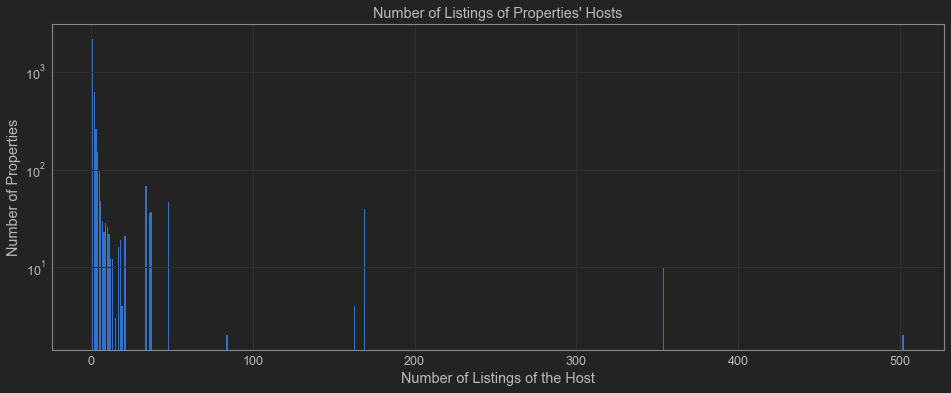

In [92]:
fig = plt.figure(figsize=(16, 6))
ax = plt.subplot(1, 1, 1)
ax.bar(listings_count_count.index, height=listings_count_count.values)
ax.set_title('Number of Listings of Properties\' Hosts')
ax.set_xlabel('Number of Listings of the Host')
ax.set_ylabel('Number of Properties')
ax.set_yscale('log')
plt.show()

We can see that the number of listings can vary highly, with the vast majority of hosts having only a single property (note the above chart's log scale) and a minority of hosts having large amounts of properties, with some over 500 properties.

I think it does not make sense to use this data numerically (a host with 500 properties are probably not getting 500 times better rating than those with 1 property). I think a better way to treat this data is to separate hosts into smaller-scale hosts and larger-scale hosts. I will try to separate hosts into those with less than 5 properties:

In [93]:
print('<5 properties:', listings_count_count[listings_count_count.index < 10].sum())
print('>=5 properties:', listings_count_count[listings_count_count.index >= 10].sum())

<5 properties: 3438
>=5 properties: 378


In [94]:
# New variable with is True for 5 or more properties
df_rating_predict['5_or_more_properties'] = df_listings_dropped_nohost['host_listings_count'] >= 5

Next we look at host has profile pic:

In [95]:
df_listings.groupby('host_has_profile_pic')['price'].count().sort_values(ascending=False).head(10)

host_has_profile_pic
t    3809
f       7
Name: price, dtype: int64

The vast majority of hosts has a profile picture. As per previously, I will treat true as 1 and false as 0:

In [96]:
df_rating_predict['host_has_profile_pic'] = df_listings_dropped_nohost[
    'host_has_profile_pic'].replace('t',1).replace('f',0).astype(int)

Next we look at host identity verified:

In [97]:
df_listings.groupby('host_identity_verified')['price'].count().sort_values(ascending=False).head(10)

host_identity_verified
t    2997
f     819
Name: price, dtype: int64

Similarly, we can treat true as 1 and false as 0:

In [98]:
df_rating_predict['host_identity_verified'] = df_listings_dropped_nohost[
    'host_identity_verified'].replace('t',1).replace('f',0).astype(int)

Next, I will join the other variables which were previously found to likely be significant, for completeness:

In [99]:
# Join columns used in previous model into dataframe
df_rating_predict = df_rating_predict.join(X2)
df_rating_predict = df_rating_predict.join(y)

In [100]:
# Separate to X and y
X = df_rating_predict.drop(columns=['review_scores_rating'])
y = df_rating_predict['review_scores_rating']

# Add constant term
X = sm.add_constant(X)

In [101]:
# Create OLS model from y and X. Relevant columns in X converted to float to avoid type error
mod = sm.OLS(y, X.astype('float'))
# Get result from fitting model
res = mod.fit()
print(res.summary())

                             OLS Regression Results                             
Dep. Variable:     review_scores_rating   R-squared:                       0.114
Model:                              OLS   Adj. R-squared:                  0.108
Method:                   Least Squares   F-statistic:                     18.05
Date:                  Sat, 17 Apr 2021   Prob (F-statistic):           2.70e-80
Time:                          05:47:33   Log-Likelihood:                -12034.
No. Observations:                  3816   AIC:                         2.412e+04
Df Residuals:                      3788   BIC:                         2.430e+04
Df Model:                            27                                         
Covariance Type:              nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

The above mode shows a signicant improvement in term of R-squared from the previous model, to around 0.114 from around 0.046. However this new rate is still not very good.

Some of the factors from the previous model had P values increased above the 0.5 cutoff, so I will remove them and see if there is any difference to the performance.

In [102]:
X2 = X.drop(columns=['square_feet', 'room_type_Shared room'])

In [103]:
# Create OLS model from y and X. Relevant columns in X converted to float to avoid type error
mod = sm.OLS(y, X2.astype('float'))
# Get result from fitting model
res = mod.fit()
print(res.summary())

                             OLS Regression Results                             
Dep. Variable:     review_scores_rating   R-squared:                       0.114
Model:                              OLS   Adj. R-squared:                  0.108
Method:                   Least Squares   F-statistic:                     19.48
Date:                  Sat, 17 Apr 2021   Prob (F-statistic):           1.70e-81
Time:                          05:47:33   Log-Likelihood:                -12035.
No. Observations:                  3816   AIC:                         2.412e+04
Df Residuals:                      3790   BIC:                         2.428e+04
Df Model:                            25                                         
Covariance Type:              nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

As expected, there is little effect on the R-squared. Either way, I will try to split the data into training and test sets to see how the prediction would perform:

In [104]:
# Split into train and test data with test size of 25% and fixed random state
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = .25, random_state=1) 

In [105]:
# Instantiate model and fit
lm_model = LinearRegression(normalize=True)  
lm_model.fit(X_train, y_train)  

# Get predictions from test and training data
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

# Get scores for test and training data
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(
    train_score, test_score))

The rsquared on the training data was 0.12111874967020697.  The rsquared on the test data was 0.07996198268141241.


As we can see, the prediction power of the model is low. However, based on the regression, we can see that there are some factors which appear to have significance at affecting the rating of a property.

In [106]:
# Create a coefficient dataframe and retrieve coefficient names, value and absolute values
coefs_df = pd.DataFrame()
coefs_df['est_int'] = X_train.columns
coefs_df['coefs'] = lm_model.coef_
coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
# Sort by absolute value
coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)

In [107]:
coefs_df.head(10)

,est_int,coefs,abs_coefs
15,property_type_Chalet,-11.528727,11.528727
1,host_response_time_within a day,3.943768,3.943768
26,neighbourhood_group_cleansed_University District,-3.935986,3.935986
3,host_response_time_within an hour,3.535501,3.535501
2,host_response_time_within a few hours,2.886017,2.886017
7,host_is_superhost,2.784332,2.784332
9,host_has_profile_pic,-2.757452,2.757452
8,5_or_more_properties,-1.733165,1.733165
18,neighbourhood_group_cleansed_Cascade,-1.669288,1.669288
6,host_acceptance_rate_missing,1.632372,1.632372


Based on the above, it appears that the Chalet property type has a high effect on the rating. However, it should be noted that it was seen earlier that there are only 2 properties which are classified as such. As thus, the actual usefulness of this factor is likely to be low.

3 of the top 5 factors are host response time, where the default value is "within a few days". We can see that hosts which respond sooner tend to have properties which are more highly rated.

2 of the top 10 factors are University District and Cascade neighbourhoods, which have negative coefficients, which is consistent with the lowest rated neighbourhoods as seen previously.

The host being a superhost has a significant coefficient, which is consistent with the qualifications of a superhost, one of which is to have an average rating of 95% or above.

Host having profile pic appears to give a negative effect, although the number of hosts with no profile pics is very low (7) so this may not be useful in real prediction either.

The host having a higher number of properties also seem to have a negative effect on rating. This could make sense as hosts with a large amount of properties may be less able to ensure good experience for all their properties, leading to a lower rating score.

Host acceptance rate missing appears to have a positive effect on rating, although it is unclear what this could represent.

Nonetheless, it appears that a model to predict the rating of a property has quite poor performance. However, based on the regression result, there appears to be some variables that have some understandable effects on ratings.